In [ ]:
!pip install torchsummary

In [ ]:
import torch
import torch.nn as nn
import torch.optim as opt
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Preprocessing
transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,)) # Normalizing
])

In [ ]:
# Load dataset
train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transforms, download=True)
test_dataset = torchvision.datasets.MNIST(root="./data", train=False, transform=transforms, download=True)

# Check dataset
image, label = train_dataset[0]
print("Image SHAPE:",image.shape,"\nNumber of training samples:", len(train_dataset))

image, label = test_dataset[0]
print("Image Shape:",image.shape)
print("Number of testing samples:",len(test_dataset))

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

Image SHAPE: torch.Size([1, 28, 28]) 
Number of training samples: 60000
Image Shape: torch.Size([1, 28, 28])
Number of testing samples: 10000


In [ ]:
class CNNClassifier(nn.Module):
  def __init__(self):
    super(CNNClassifier, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
    self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
    self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
    self.fc1 = nn.Linear(128 * 3 * 3, 128)
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, 10)

  def forward(self, x):
    x = self.pool(torch.relu(self.conv1(x)))
    x = self.pool(torch.relu(self.conv2(x)))
    x = self.pool(torch.relu(self.conv3(x)))
    x = x.view(x.size(0), -1)
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [ ]:
# Print model summary
from torchsummary import summary

model = CNNClassifier()
if torch.cuda.is_available():
    device = torch.device("cuda")
    model.to(device)

print("Name: SHYAM S")
print("Register No: 212223240156")

# Print model summary
summary(model, input_size=(1, 28, 28))  # MNIST image size

# Define Loss Function & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = opt.Adam(model.parameters(), lr=0.001)

Name: SHYAM S
Register No: 212223240156
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
         MaxPool2d-2           [-1, 32, 14, 14]               0
            Conv2d-3           [-1, 64, 14, 14]          18,496
         MaxPool2d-4             [-1, 64, 7, 7]               0
            Conv2d-5            [-1, 128, 7, 7]          73,856
         MaxPool2d-6            [-1, 128, 3, 3]               0
            Linear-7                  [-1, 128]         147,584
            Linear-8                   [-1, 64]           8,256
            Linear-9                   [-1, 10]             650
Total params: 249,162
Trainable params: 249,162
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.42
Params size (MB): 0.95
Estimated Total Size (MB): 1.37
---

In [ ]:
def train_model(model, train_loader, num_epochs=10):
  for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
      if torch.cuda.is_available():
        images, labels=images.to(device),labels.to(device)


      optimizer.zero_grad()
      outputs = model(images)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()
      running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

print("Name: SHYAM S")
print("Register No: 212223240156")

train_model(model, train_loader, num_epochs=10)

Epoch [1/10], Loss: 0.1658
Epoch [2/10], Loss: 0.0460
Epoch [3/10], Loss: 0.0336
Epoch [4/10], Loss: 0.0260
Epoch [5/10], Loss: 0.0225
Epoch [6/10], Loss: 0.0183
Epoch [7/10], Loss: 0.0162
Epoch [8/10], Loss: 0.0133
Epoch [9/10], Loss: 0.0137
Epoch [10/10], Loss: 0.0118
Name: SHYAM S
Register No: 212223240156


Name: SHYAM S
Register No: 212223240156
Test Accuracy: 0.9930
Name: SHYAM S
Register No: 212223240156


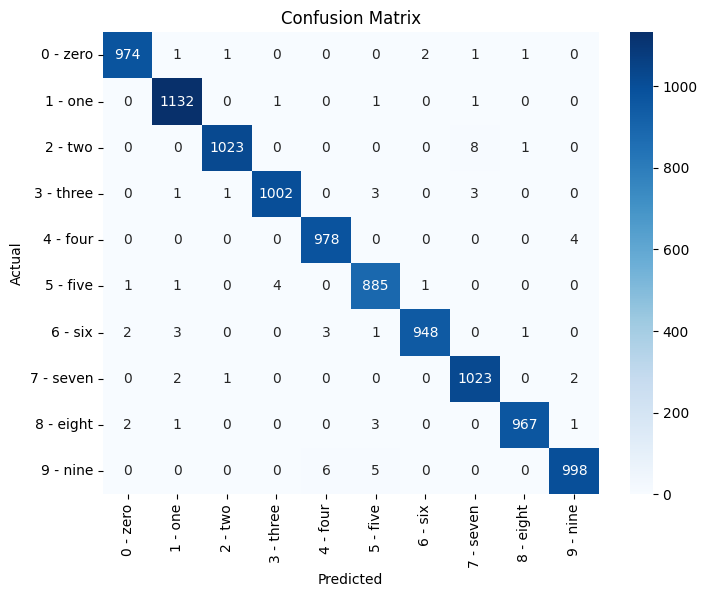

Name: SHYAM S
Register No: 212223240156
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
def test_model(model, test_loader):
  model.eval()
  correct = 0
  total = 0
  all_preds = []
  all_labels = []

  with torch.no_grad():
    for images, labels in test_loader:
      if torch.cuda.is_available():
        images, labels = images.to(device), labels.to(device)

      outputs = model(images)
      _, predicted = torch.max(outputs, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
      all_preds.extend(predicted.cpu().numpy())
      all_labels.extend(labels.cpu().numpy())

  accuracy = correct/total
  print("Name: SHYAM S")
  print("Register No: 212223240156")
  print(f"Test Accuracy: {accuracy:.4f}")

  cm = confusion_matrix(all_labels, all_preds)
  plt.figure(figsize=(8, 6))
  print("Name: SHYAM S")
  print("Register No: 212223240156")
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_dataset.classes, yticklabels=test_dataset.classes)
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix")
  plt.show()

  print("Name: SHYAM S")
  print("Register No: 212223240156")
  print("Classification Report:")
  print(classification_report(all_labels, all_preds, target_names=[str(i) for i in range(10)]))
test_model(model, test_loader)

Name: SHYAM S
Register No: 212223240156
Test Accuracy: 0.9930
Name: SHYAM S
Register No: 212223240156


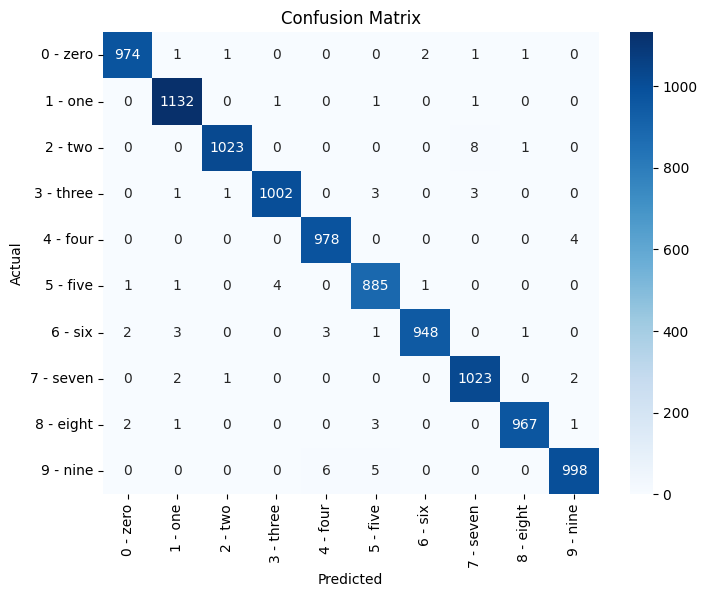

Name: SHYAM S
Register No: 212223240156
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Name: SHYAM S
Register No: 212223240156


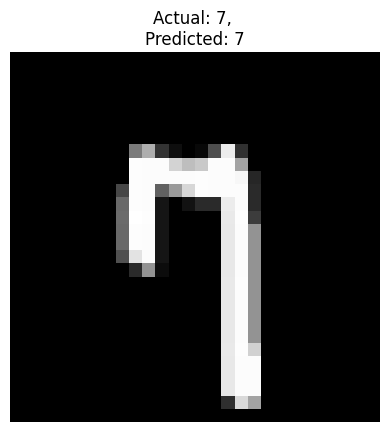

Actual: 7, 
Predicted: 7


In [ ]:
test_model(model, test_loader)

def predict_image(model, image_index, dataset):
  model.eval()
  image, label = dataset[image_index]
  if torch.cuda.is_available():
    image = image.to(device)

  with torch.no_grad():
    output = model(image.unsqueeze(0))
    _, predicted = torch.max(output, 1)

  class_names = [str(i) for i in range(10)]

  print("Name: SHYAM S")
  print("Register No: 212223240156")
  plt.imshow(image.cpu().squeeze(), cmap="gray")
  plt.title(f"Actual: {class_names[label]}, \nPredicted: {class_names[predicted.item()]}")
  plt.axis("off")
  plt.show()
  print(f"Actual: {class_names[label]}, \nPredicted: {class_names[predicted.item()]}")

predict_image(model, image_index=80, dataset=test_dataset)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')